# 22 February 2023

NOTE:   Scraping with data from YouTube was not possible with BeautifulSoup so I had to use another python package called Selenium.

## Code For Scrapping The Data And Storing In A CSV:

extract.py

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

driver = webdriver.Edge()
driver.maximize_window()
link="https://www.youtube.com/@PW-Foundation/videos"
driver.get(link)

try:
    
    vid_details = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-rich-grid-renderer')
    urls = driver.find_elements(By.XPATH,'//*[@id="video-title-link"]')
    thumbnails = driver.find_elements(By.XPATH,'//*[@id="thumbnail"]/yt-image/img')
    titles = driver.find_elements(By.XPATH,'//*[@id="video-title"]')
    views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
    times = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
except:
		driver.quit()

d={}
for i in range(1,6):
    url=urls[i]
    thumbnail=thumbnails[i]
    title=titles[i]
    view=views[i]
    time=times[i]
    dic={"URL":url.get_attribute("href"),"Thumbnail":thumbnail.get_attribute("src"),"Title":title.text, "Views":view.text, "Time":time.text}
    d[len(d)]=dic

df = pd.DataFrame.from_dict(d, orient='index')
df.to_csv('Youtube_Scrapper.csv')
driver.quit()

Link To CSV File: https://github.com/AryamanTamotia/Youtube_Scrapper/blob/main/Youtube_Scrapper.csv

Here's How The Data Looks In CSV File:

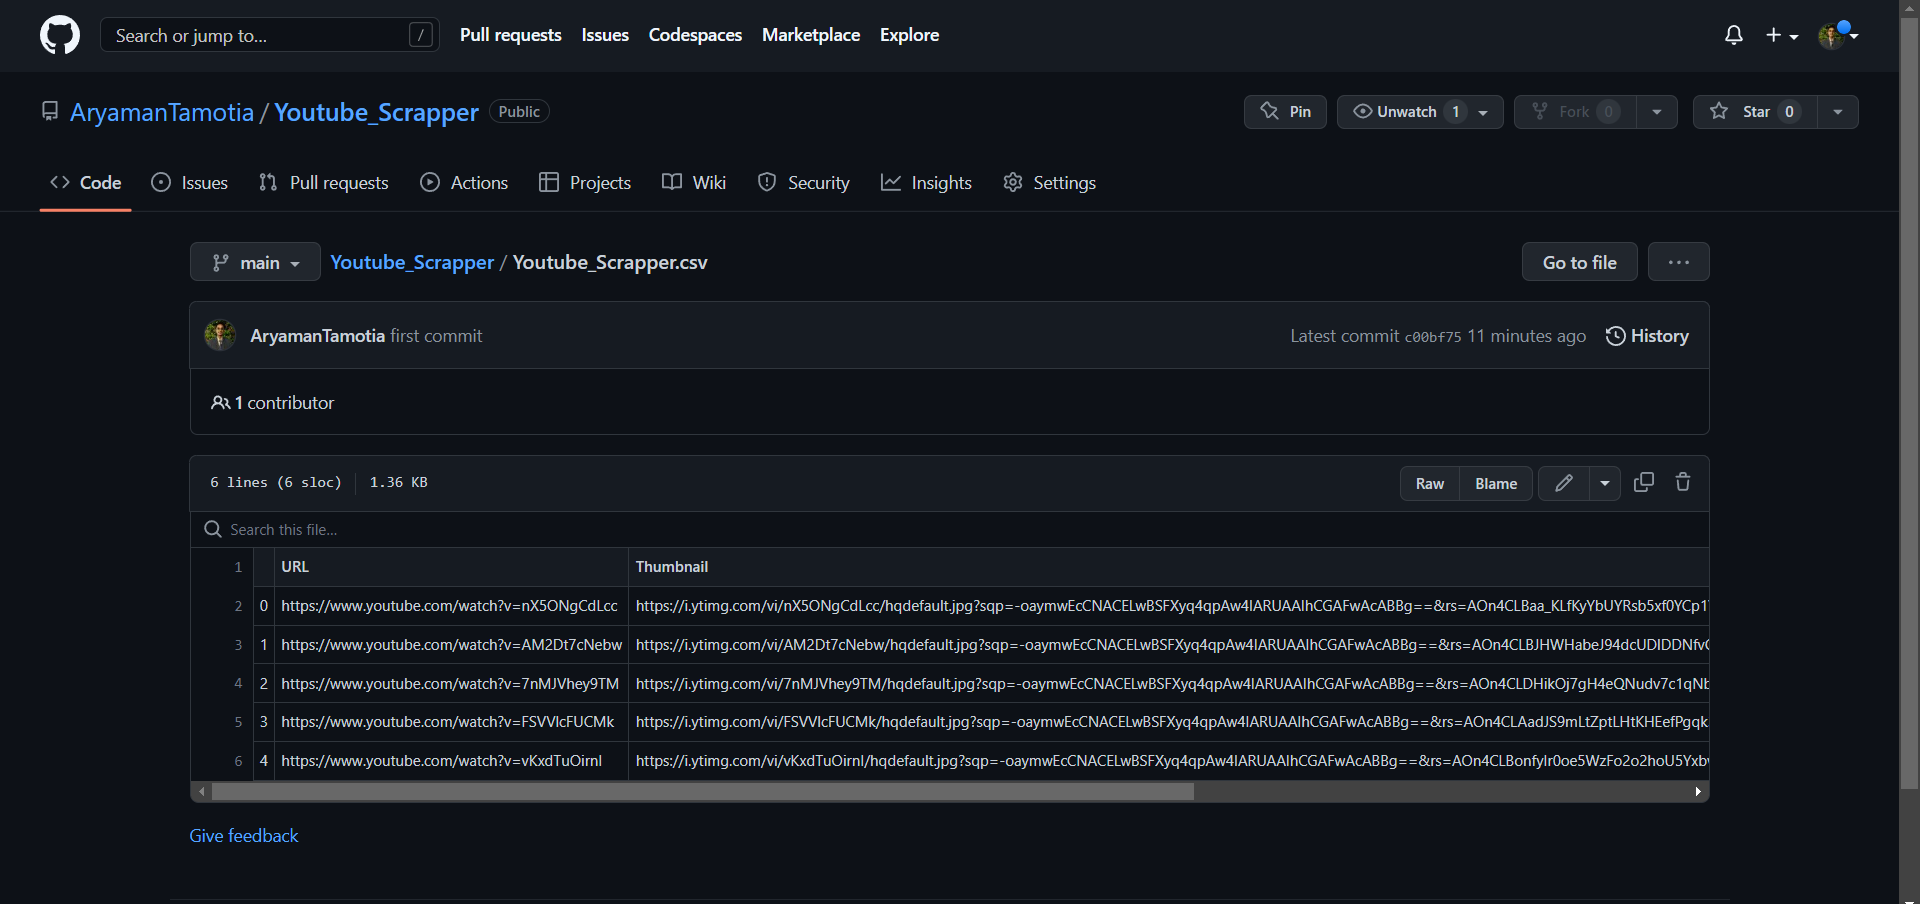

## Code for Flask Front-End:

application.py

In [ ]:
from flask import Flask, render_template
from flask_cors import CORS,cross_origin
import csv

application = Flask(__name__)
app=application


csv_filename = 'Youtube_Scrapper.csv'

details=[]

with open(csv_filename,'r') as data:
    for line in csv.reader(data):
        mydict = {"Index": line[0], "URL": line[1], "Thumbnail": line[2], "Title": line[3], "Views": line[4], "Time": line[5]}
        details.append(mydict)


@app.route("/")
@cross_origin()
def home():
	return render_template('result.html',details=details)

if __name__=="__main__":
    app.run(host='127.0.0.1', port=8000, debug=True)

result.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <title>Youtube Scrapper</title>

    <link
      rel="stylesheet"
      href="https://cdnjs.cloudflare.com/ajax/libs/normalize/5.0.0/normalize.min.css"
    />

    <link rel="stylesheet" href="./style.css" />
    <link
      rel="stylesheet"
      href="{{ url_for('static', filename='css/style.css') }}"
    />
  </head>

  <body>
    <div class="table-users">
      <div class="header">Reviews</div>

      <table cellspacing="0">
        <tr>
          <th>Index</th>
          <th>URL</th>
          <th>Thumbnail</th>
          <th>Title</th>
          <th>Views</th>
          <th>Time</th>
        </tr>
        {% for detail in details %}
        <tr>
          <td>{{detail.Index}}</td>
          <td>{{detail.URL}}</td>
          <td>{{detail.Thumbnail}}</td>
          <td>{{detail.Title}}</td>
          <td>{{detail.Views}}</td>
          <td>{{detail.Time}}</td>
          {% endfor %}
        </tr>
      </table>
    </div>
  </body>
</html>

styles.css

In [ ]:
body {
  background-color: #91ced4;
}
body * {
  box-sizing: border-box;
}

.header {
  background-color: #327a81;
  color: white;
  font-size: 1.5em;
  padding: 1rem;
  text-align: center;
  text-transform: uppercase;
}

img {
  border-radius: 50%;
  height: 60px;
  width: 60px;
}

.table-users {
  border: 1px solid #327a81;
  border-radius: 10px;
  box-shadow: 3px 3px 0 rgba(0, 0, 0, 0.1);
  max-width: calc(100% - 2em);
  margin: 1em auto;
  overflow: hidden;
}

table {
  width: 100%;
}
table td,
table th {
  color: #2b686e;
  padding: 10px;
}
table td {
  text-align: center;
  vertical-align: middle;
}
table td:last-child {
  font-size: 0.95em;
  line-height: 1.4;
  text-align: left;
}
table th {
  background-color: #daeff1;
  font-weight: 300;
}
table tr:nth-child(2n) {
  background-color: white;
}
table tr:nth-child(2n + 1) {
  background-color: #edf7f8;
}

@media screen and (max-width: 700px) {
  table,
  tr,
  td {
    display: block;
  }

  td:first-child {
    position: absolute;
    top: 50%;
    -webkit-transform: translateY(-50%);
    transform: translateY(-50%);
    width: 100px;
  }
  td:not(:first-child) {
    clear: both;
    margin-left: 100px;
    padding: 4px 20px 4px 90px;
    position: relative;
    text-align: left;
  }
  td:not(:first-child):before {
    color: #91ced4;
    content: "";
    display: block;
    left: 0;
    position: absolute;
  }
  td:nth-child(2):before {
    content: "Name:";
  }
  td:nth-child(3):before {
    content: "Email:";
  }
  td:nth-child(4):before {
    content: "Phone:";
  }
  td:nth-child(5):before {
    content: "Comments:";
  }

  tr {
    padding: 10px 0;
    position: relative;
  }
  tr:first-child {
    display: none;
  }
}
@media screen and (max-width: 500px) {
  .header {
    background-color: transparent;
    color: white;
    font-size: 2em;
    font-weight: 700;
    padding: 0;
    text-shadow: 2px 2px 0 rgba(0, 0, 0, 0.1);
  }

  img {
    border: 3px solid;
    border-color: #daeff1;
    height: 100px;
    margin: 0.5rem 0;
    width: 100px;
  }

  td:first-child {
    background-color: #c8e7ea;
    border-bottom: 1px solid #91ced4;
    border-radius: 10px 10px 0 0;
    position: relative;
    top: 0;
    -webkit-transform: translateY(0);
    transform: translateY(0);
    width: 100%;
  }
  td:not(:first-child) {
    margin: 0;
    padding: 5px 1em;
    width: 100%;
  }
  td:not(:first-child):before {
    font-size: 0.8em;
    padding-top: 0.3em;
    position: relative;
  }
  td:last-child {
    padding-bottom: 1rem !important;
  }

  tr {
    background-color: white !important;
    border: 1px solid #6cbec6;
    border-radius: 10px;
    box-shadow: 2px 2px 0 rgba(0, 0, 0, 0.1);
    margin: 0.5rem 0;
    padding: 0;
  }

  .table-users {
    border: none;
    box-shadow: none;
    overflow: visible;
  }
}

## App Running On My Local Computer

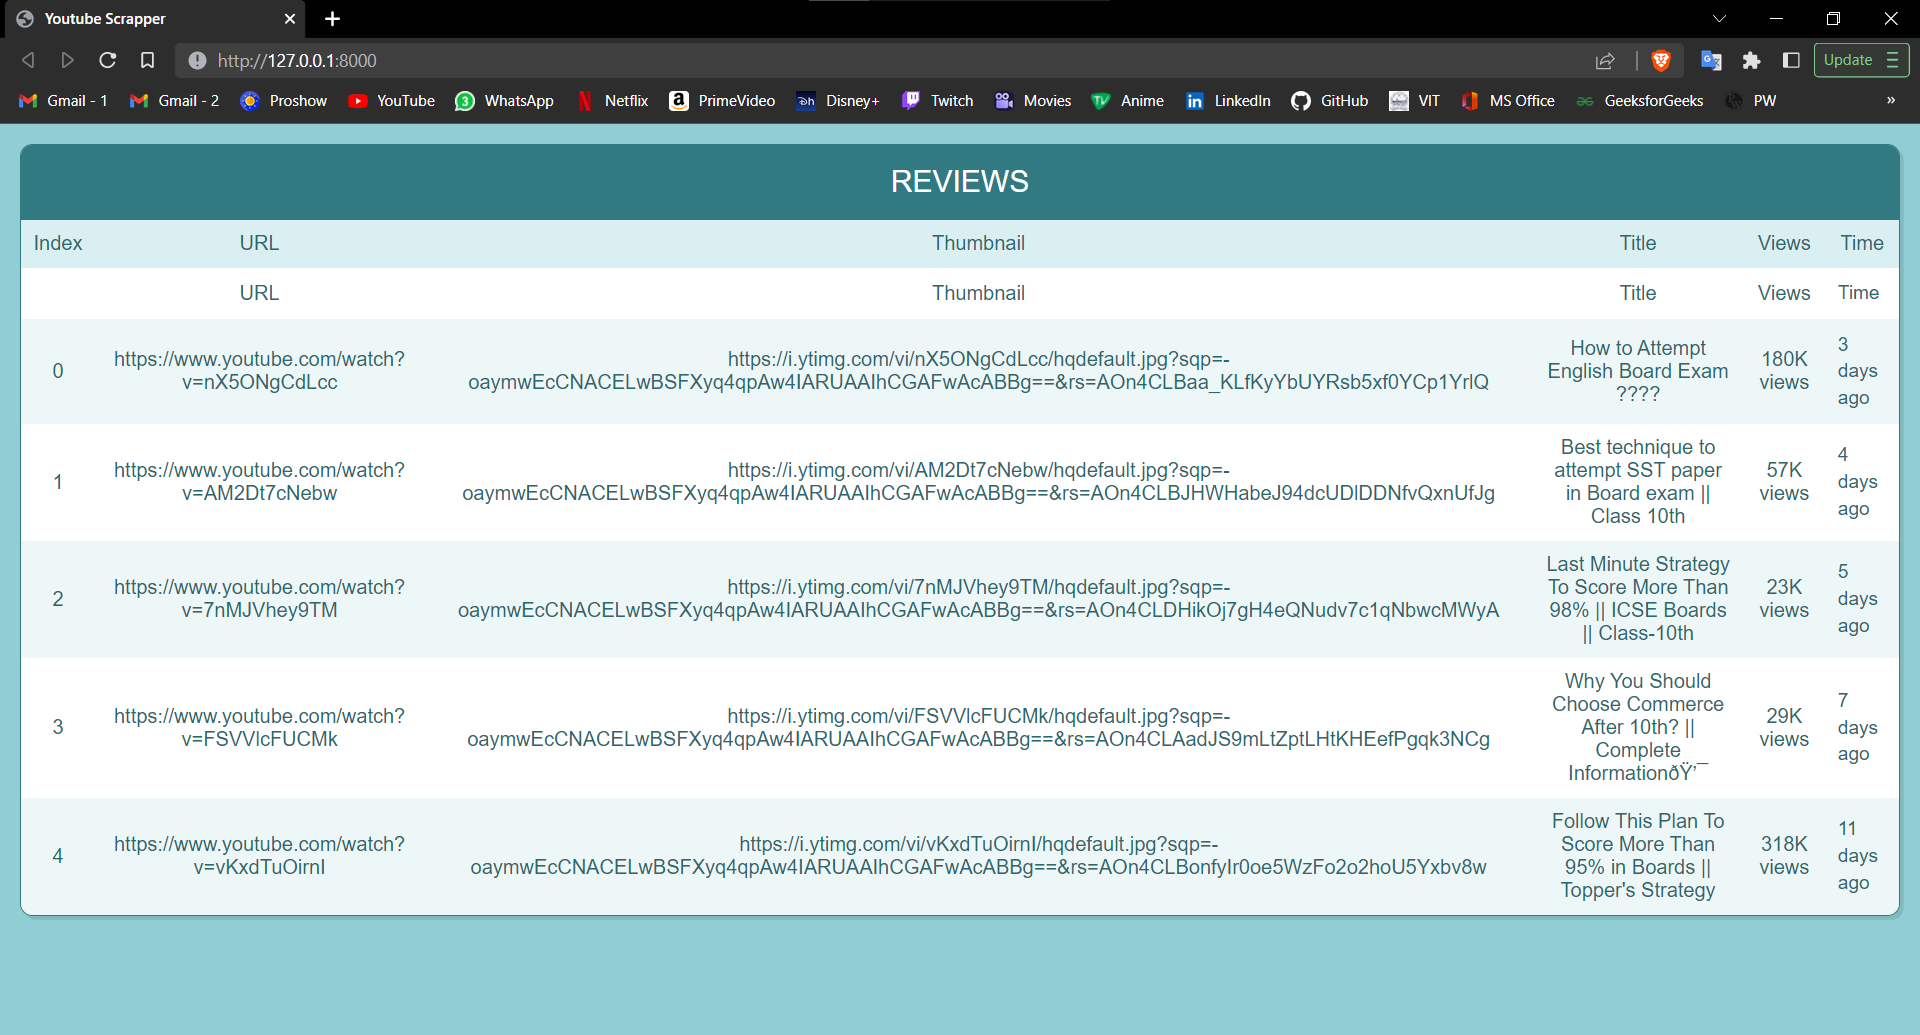

## App Running On AWS Cloud

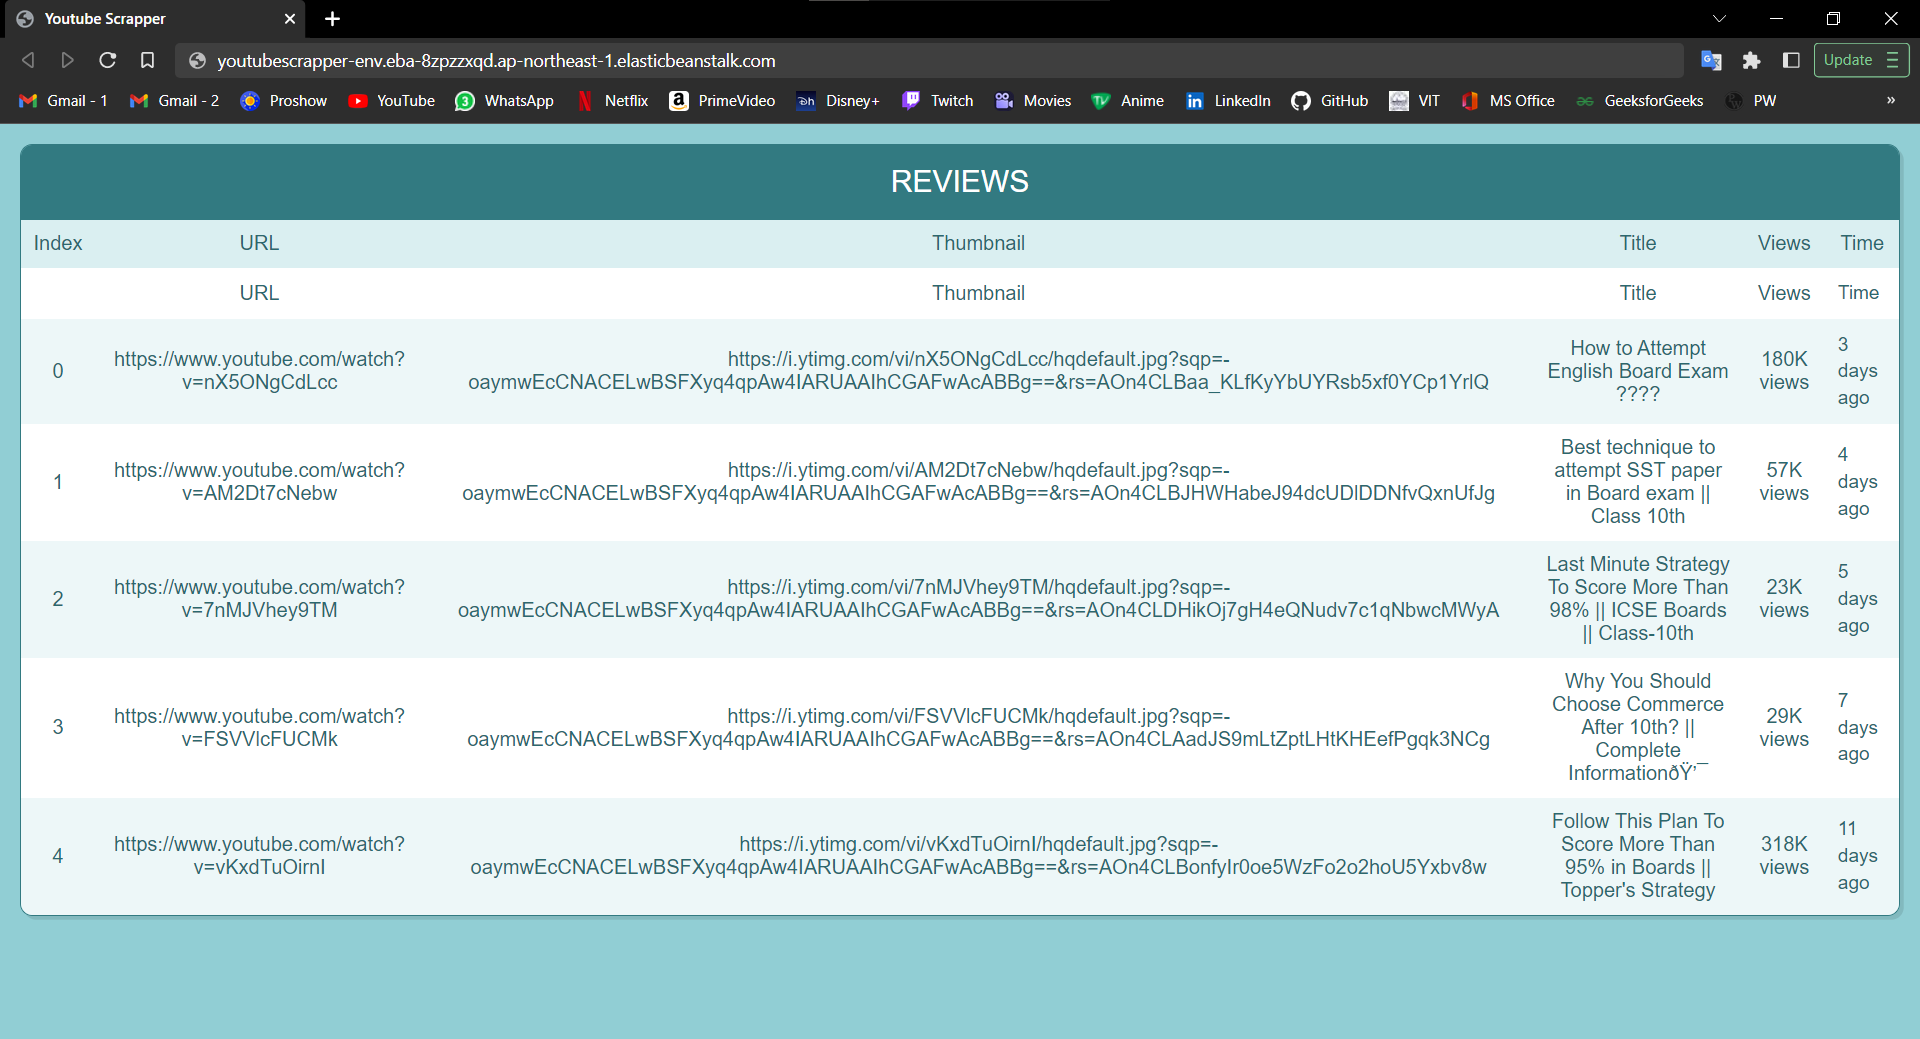

### Link To GitHub Repo

It contains all the files and everything regarding this project

https://github.com/AryamanTamotia/Youtube_Scrapper